In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load Dataset

In [5]:
df = pd.read_csv('../Datasets/train-balanced-sarcasm.csv')
politics = df[df['subreddit'] == 'politics']
politics.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
10,0,I think a significant amount would be against ...,ThisIsNotKimJongUn,politics,92,92,0,2016-09,2016-09-20 17:53:52,I bet if that money was poured into college de...
17,0,because it's what really bothers him... and it...,kozmo1313,politics,15,-1,-1,2016-12,2016-12-26 20:10:45,He actually acts like a moody emo girl on twit...
22,0,Conservatism as an ideology is for sure a reac...,MayorMcCheese59,politics,1,-1,-1,2016-12,2016-12-24 00:04:06,"I still doubt that ""all conservatives stand fo..."
23,0,"Maybe not control, but certainly that is evide...",SunTzu-,politics,1,-1,-1,2016-10,2016-10-13 20:48:14,Today Russian media tweeted out that Wikileaks...


In [8]:
politics.tail()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
1010802,1,"Thank you, Glen Beck, Rush Limbaugh, Sean Hann...",lastnotice,politics,12,12,0,2009-08,2009-08-19 03:47:23,Barney Frank Confronts Woman At Townhall Compa...
1010805,1,"What fine, upstanding young gentlemen.",IndustrialEngineer,politics,1,1,0,2009-08,2009-08-21 13:14:28,"White Adult, 2 teens charged with beating elde..."
1010811,1,Thank you unions.,boot20,politics,2,2,0,2009-05,2009-05-28 05:18:11,No wonder California is broke - The $350K Nurs...
1010820,1,:O,DiarrheaMonkey,politics,1,1,0,2009-04,2009-04-15 03:02:01,US combat troops may stay in northern Iraq aft...
1010825,1,"values, as in capitalism .. there is good mone...",frogking,politics,2,2,0,2009-01,2009-01-24 06:20:14,Why do the people who make our laws seem unabl...


In [9]:
politics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39496 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           39496 non-null  int64 
 1   comment         39493 non-null  object
 2   author          39496 non-null  object
 3   subreddit       39496 non-null  object
 4   score           39496 non-null  int64 
 5   ups             39496 non-null  int64 
 6   downs           39496 non-null  int64 
 7   date            39496 non-null  object
 8   created_utc     39496 non-null  object
 9   parent_comment  39496 non-null  object
dtypes: int64(4), object(6)
memory usage: 4.3+ MB


In [10]:
# check for any NaN values
politics.isna().sum()

label             0
comment           3
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [11]:
politics = politics.dropna() # remove na from politics subreddit

In [12]:
politics.describe()

,label,score,ups,downs
count,39493.000000,39493.000000,39493.000000,39493.000000
mean,0.605348,6.135746,3.915859,-0.240397
std,0.488782,35.116466,30.806788,0.427330
min,0.000000,-164.000000,-96.000000,-1.000000
25%,0.000000,1.000000,-1.000000,0.000000
50%,1.000000,2.000000,1.000000,0.000000
75%,1.000000,4.000000,3.000000,0.000000
max,1.000000,2987.000000,2987.000000,0.000000


In [13]:
politics.shape

(39493, 10)

# EDA for Categorical Variables
## label, comment, author, subreddit, date, parent_comment


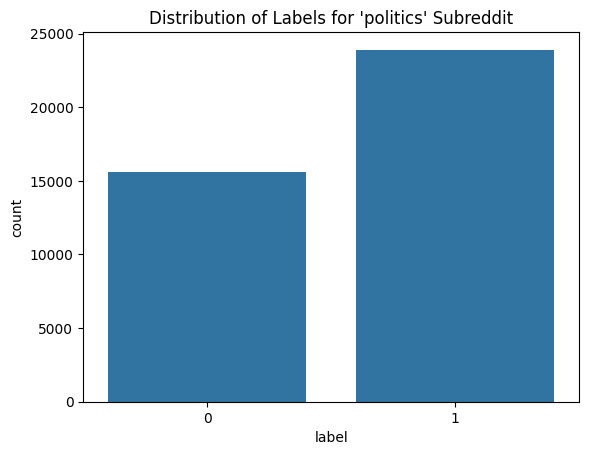

In [14]:
sns.countplot(x='label', data=politics)
plt.title("Distribution of Labels for 'politics' Subreddit")
plt.show()

In [15]:
def get_top_words(df, column_name, num_words):
  count_vectorizer = CountVectorizer(stop_words='english')
  word_count = count_vectorizer.fit_transform(df[column_name])

  word_sum = word_count.sum(axis=0)

  frequency = []
  for word, index in count_vectorizer.vocabulary_.items():
    frequency.append((word, word_sum[0, index]))

  frequency = sorted(frequency, key=lambda x: x[1], reverse=True)
  return frequency

In [16]:
# Top 10 frequently used words from comments
print(get_top_words(politics, 'comment', 10))

[('just', 2680), ('people', 2352), ('like', 2135), ('yeah', 2107), ('trump', 1872), ('don', 1719), ('right', 1429), ('sure', 1108), ('yes', 1010), ('know', 1008), ('think', 1006), ('hillary', 977), ('good', 923), ('obama', 855), ('vote', 843), ('really', 764), ('clinton', 709), ('going', 696), ('make', 694), ('didn', 658), ('doesn', 655), ('oh', 630), ('money', 624), ('want', 623), ('time', 621), ('need', 616), ('forgot', 614), ('did', 606), ('way', 597), ('bernie', 595), ('president', 584), ('thing', 568), ('mean', 562), ('ll', 554), ('say', 536), ('white', 526), ('great', 498), ('better', 498), ('isn', 495), ('government', 492), ('obviously', 477), ('said', 469), ('clearly', 441), ('republicans', 439), ('let', 437), ('totally', 429), ('man', 422), ('won', 413), ('party', 412), ('maybe', 400), ('republican', 400), ('bad', 399), ('got', 393), ('america', 387), ('actually', 385), ('things', 385), ('does', 384), ('election', 381), ('real', 381), ('news', 379), ('racist', 379), ('black', 

In [17]:
# Top 10 frequently used words from parent_comment
print(get_top_words(politics, 'parent_comment', 10))

[('trump', 5914), ('people', 5281), ('just', 4023), ('like', 3521), ('don', 3228), ('clinton', 2887), ('hillary', 2551), ('think', 2267), ('obama', 2073), ('right', 1839), ('vote', 1825), ('know', 1609), ('going', 1606), ('bernie', 1546), ('want', 1532), ('sanders', 1501), ('time', 1471), ('make', 1456), ('really', 1444), ('president', 1376), ('say', 1333), ('did', 1281), ('doesn', 1271), ('money', 1259), ('way', 1204), ('government', 1192), ('party', 1189), ('good', 1185), ('years', 1140), ('actually', 1120), ('state', 1108), ('does', 1054), ('donald', 1040), ('need', 1033), ('republicans', 1018), ('election', 1017), ('said', 1017), ('country', 1014), ('republican', 970), ('isn', 954), ('new', 944), ('ve', 940), ('thing', 936), ('won', 930), ('ll', 906), ('tax', 896), ('didn', 884), ('gop', 871), ('white', 867), ('says', 865), ('campaign', 862), ('shit', 830), ('things', 828), ('america', 817), ('let', 805), ('work', 794), ('support', 775), ('war', 764), ('pay', 762), ('got', 755), ('

In [18]:
def plot_bar_chart(df, column, top_n, title):
  top_categories = df[column].value_counts().head(top_n)
  top_categories.plot(kind='barh', title=title)
  print(top_categories)
  plt.show()

author
Canada_girl         275
mindlessrabble      253
ShyBiDude89         231
IrishJoe            220
gonzone             192
JumpingJazzJam      191
ivsciguy            176
TodaysIllusion      147
tau-lepton          136
sleaze_bag_alert    102
Name: count, dtype: int64


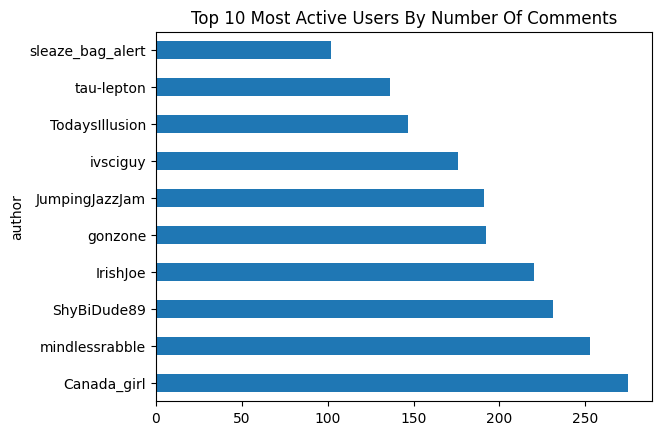

In [19]:
plot_bar_chart(politics, 'author', 10, 'Top 10 Most Active Users By Number Of Comments')

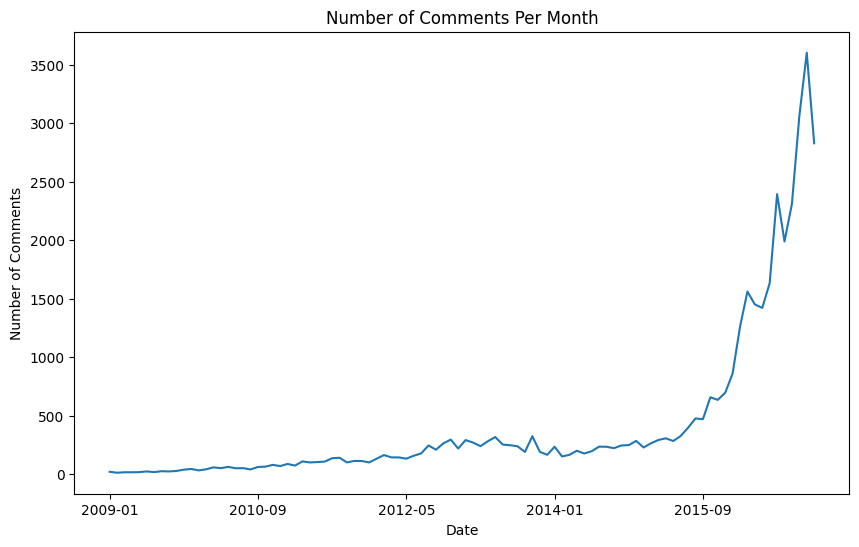

In [21]:
# convert to date time
politics['date_column'] = pd.to_datetime(politics['date'], format='%Y-%m')

# count the number of comments per month
monthly_counts = politics.groupby('date').size()

# plot the time series
plt.figure(figsize=(10,6))
monthly_counts.plot(kind='line')
plt.title('Number of Comments Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()

# EDA for Numerical Variables
## scores, ups, downs

In [22]:
def box_plot(df, column, title):
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])

  plt.title(title)
  plt.ylabel('Values')

In [23]:
def histogram(df, column, title, bins):
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=bins, edgecolor='black')

  plt.title(title)
  plt.xlabel('Values')
  plt.ylabel('Frequency')

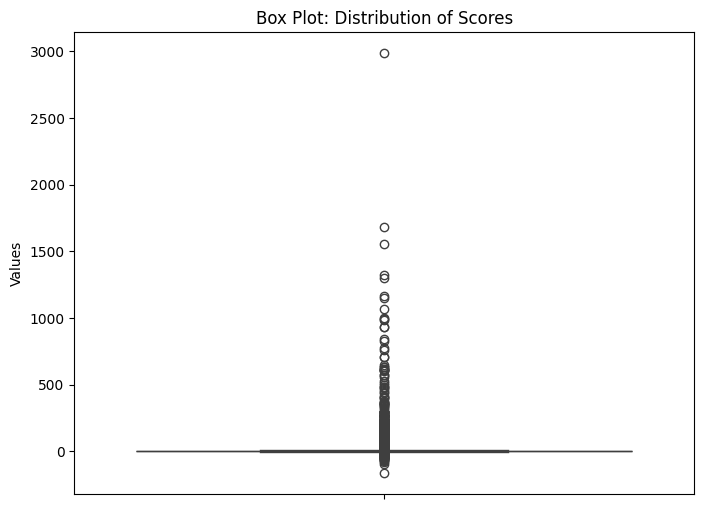

In [24]:
box_plot(politics, 'score', 'Box Plot: Distribution of Scores')
# Shows negative scores

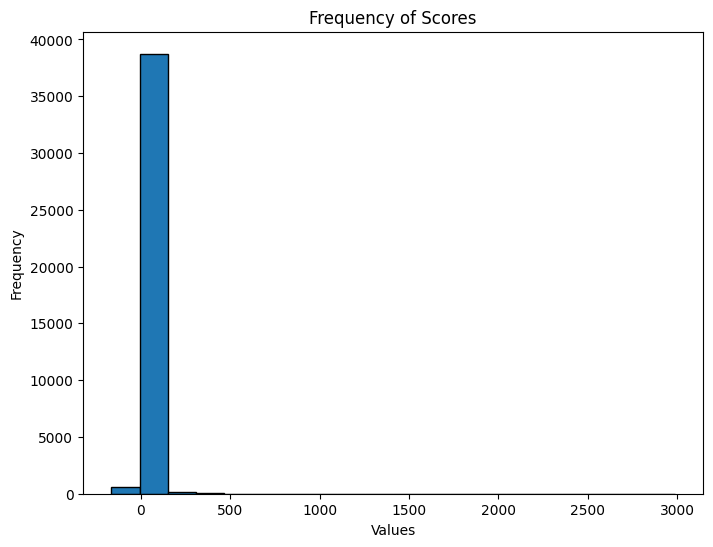

In [25]:
histogram(politics, 'score', 'Frequency of Scores', 20)

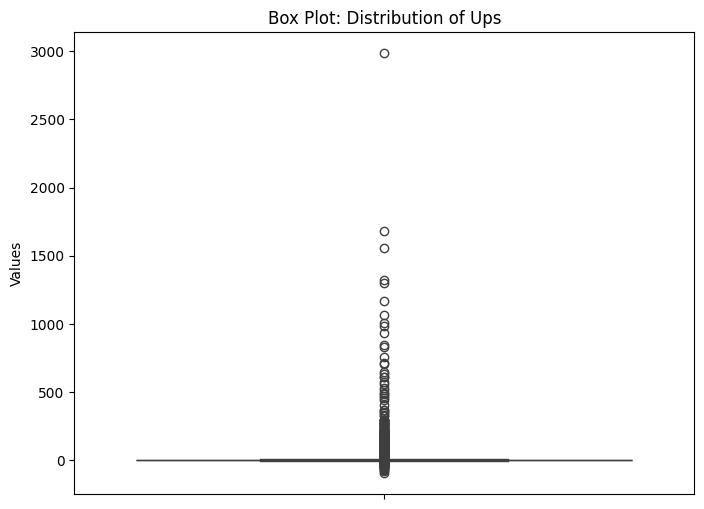

In [26]:
box_plot(politics, 'ups', 'Box Plot: Distribution of Ups')

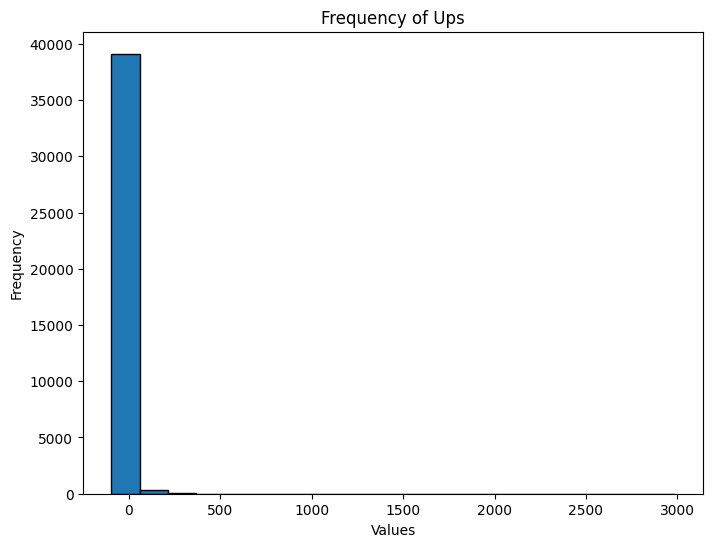

In [27]:
histogram(politics, 'ups', 'Frequency of Ups', 20)

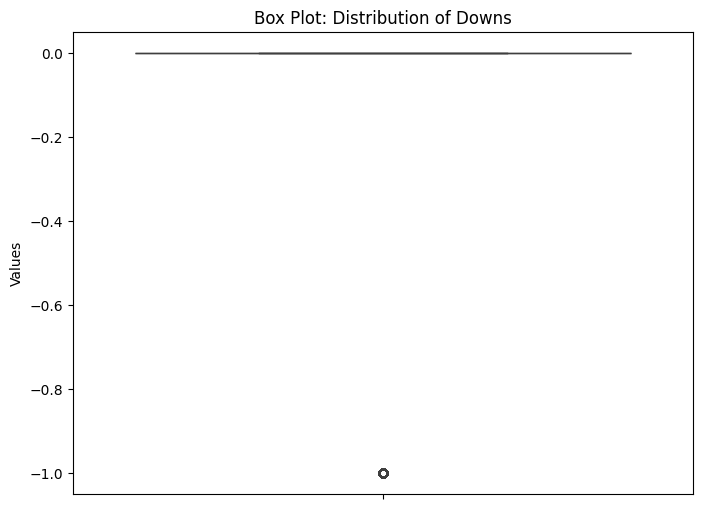

In [28]:
box_plot(politics, 'downs', 'Box Plot: Distribution of Downs')

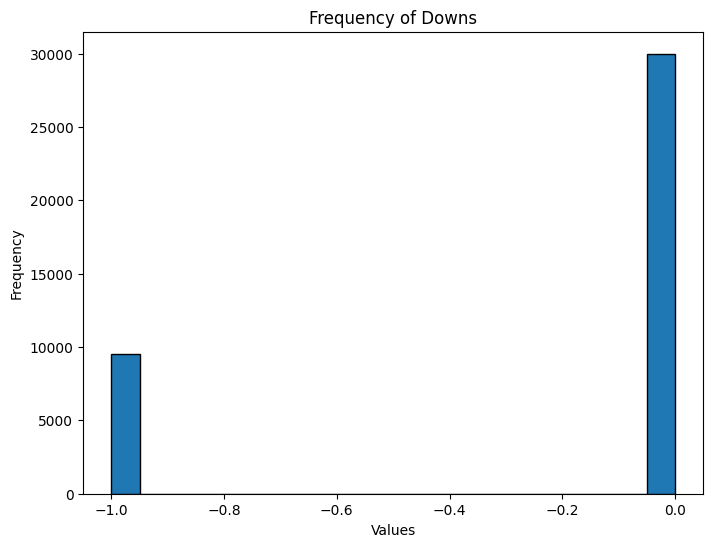

In [29]:
histogram(politics, 'downs', 'Frequency of Downs', 20)

<function matplotlib.pyplot.show(close=None, block=None)>

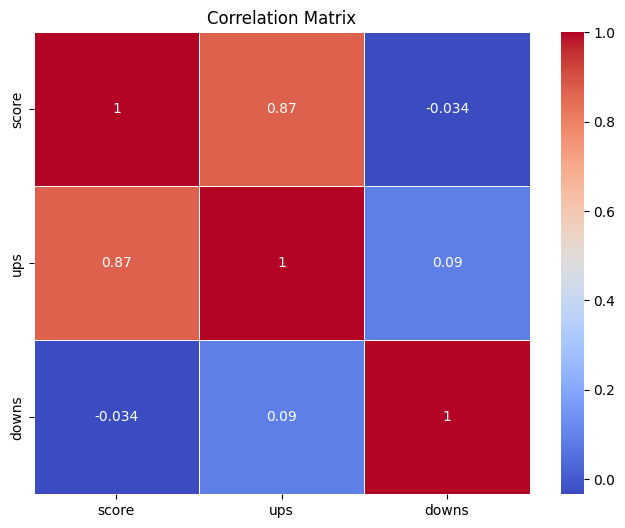

In [30]:
# Plot correlation matrix

df_numeric = politics[['score', 'ups', 'downs']]
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show